In [37]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from openpyxl import load_workbook
plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.rcParams.update({'font.size': 22})

# Loading the data


In [4]:
with open("../OneDrive_1_05-10-2018/Headers.csv", 'rt') as f:
    headers = pd.read_csv(f)

In [5]:
data = dict()
for file in range(2013,2019):
    print(file)
    with open("../OneDrive_1_05-10-2018/%s.csv"%file, 'rt') as f:
        data[file] = pd.read_csv(f,header=None)
        data[file].columns = headers.columns
        data[file]["year"] = file

2013
2014
2015
2016
2017
2018


In [6]:
all_data = pd.concat([item for _,item in data.items()])


In [7]:
for col in ['userid','company','company_de']:
    all_data[col] = pd.to_numeric(all_data[col],downcast='unsigned')

/Users/severinhatt/Virtualenvs/thinkful/base_plotting/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


In [10]:
wb = load_workbook(filename='../OneDrive_1_05-10-2018/SRM Trades.xlsx', read_only=True)
ws = wb.active
srm = list()
for row in ws.rows:
    srm_list = {'id': row[0].value ,'trade': row[1].value , 'active': row[2].value}
    srm.append(srm_list)
srm_df = pd.DataFrame.from_records(srm[1:]) #first line is the header

In [11]:
all_data=all_data.merge(srm_df,left_on='trade',right_on="id").drop("trade_x",axis=1).rename({"trade_y":"trade"},axis=1)

In [12]:
all_data[all_data.year == 2013].sample(5)

,userid,swipeIn,swipeOut,auto,company,company_de,panel_in,panel_out,AreaID,SiteID,year,active,id,trade
6180590,5919.0,03:30.0,53:25.0,0,53.0,53.0,27,28,9,6,2013,1,1187,DRIVER
421663,37.0,20:15.0,20:15.0,1,2.0,2.0,3,0,3,1,2013,1,1383,WORKS MANAGER
8531196,2130.0,25:33.0,26:38.0,0,27.0,27.0,34,35,1,1,2013,1,1562,TRAFFIC MARSHALL
5058549,6022.0,20:30.0,35:11.0,0,2.0,2.0,15,16,5,3,2013,1,1243,MANAGER
7449188,4474.0,48:35.0,52:41.0,0,210.0,2.0,78,79,20,16,2013,1,1148,BRICKLAYER


In [13]:
#In 2013 SwipeIn seems to only by a time with no dates...
all_data_but_2013 =  all_data[all_data.year != 2013].copy()

In [14]:
for col in ['swipeIn','swipeOut']:
    all_data_but_2013[col] = pd.to_datetime(all_data_but_2013[col])

In [35]:
all_data_but_2013["work_hours"] = (all_data_but_2013.swipeOut - all_data_but_2013.swipeIn).dt.seconds/3600
all_data_but_2013["session_minute"] = (all_data_but_2013.swipeOut - all_data_but_2013.swipeIn).dt.seconds/60


all_data_but_2013.info()

In [17]:
all_data_but_2013.describe()

,userid,auto,company,company_de,panel_in,panel_out,AreaID,SiteID,year,active,id,work_hours
count,1.677834e+07,1.677834e+07,1.677834e+07,1.677834e+07,1.677834e+07,1.677834e+07,1.677834e+07,1.677834e+07,1.677834e+07,16778344.0,1.677834e+07,1.674558e+07
mean,6.015447e+04,9.699348e-02,9.220415e+02,9.174021e+02,2.152038e+02,1.924310e+02,5.554201e+01,3.607639e+01,2.015781e+03,1.0,1.530737e+03,1.493867e+00
std,3.177530e+04,2.959489e-01,9.646966e+02,9.844251e+02,1.377042e+02,1.447427e+02,3.556699e+01,2.156686e+01,1.138198e+00,0.0,4.776844e+02,2.364724e+00
min,2.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,2.014000e+03,1.0,1.130000e+03,0.000000e+00
25%,3.447400e+04,0.000000e+00,1.510000e+02,1.240000e+02,7.400000e+01,7.100000e+01,1.800000e+01,1.500000e+01,2.015000e+03,1.0,1.229000e+03,9.416667e-02
50%,6.098700e+04,0.000000e+00,6.700000e+02,6.490000e+02,2.100000e+02,1.790000e+02,5.300000e+01,3.700000e+01,2.016000e+03,1.0,1.310000e+03,5.761111e-01
75%,8.250200e+04,0.000000e+00,1.354000e+03,1.354000e+03,3.230000e+02,3.020000e+02,7.400000e+01,4.200000e+01,2.017000e+03,1.0,1.657000e+03,1.930278e+00
max,1.306770e+05,1.000000e+00,4.242000e+03,4.242000e+03,5.350000e+02,5.360000e+02,1.420000e+02,9.600000e+01,2.018000e+03,1.0,3.577000e+03,2.399861e+01


In [18]:
all_data_but_2013["swipeIn_date"] =all_data_but_2013.swipeIn.dt.date
all_data_but_2013["swipeIn_date"] = pd.to_datetime(all_data_but_2013["swipeIn_date"])

In [19]:
swipe_per_day_per_user = all_data_but_2013[~all_data_but_2013.work_hours.isna()].groupby(["trade","userid","swipeIn_date"]).agg({'userid': 'count', 'work_hours': ['sum','max',"median",'min']})

In [20]:
swipe_per_day_per_user.columns = swipe_per_day_per_user.columns.droplevel()

In [21]:
swipe_per_day_per_user.head()

count       sum       max  \
trade                  userid  swipeIn_date                              
360 EXCAVATOR OPERATOR 46876.0 2017-01-27       16  5.299722  1.045278   
                               2017-01-30        7  7.109722  2.396389   
                               2017-01-31        8  3.615278  1.313056   
                               2017-02-01       14  6.902222  2.419167   
                               2017-02-02       19  6.678333  1.560000   

                                               median       min  
trade                  userid  swipeIn_date                      
360 EXCAVATOR OPERATOR 46876.0 2017-01-27    0.051250  0.008611  
                               2017-01-30    0.799167  0.058611  
                               2017-01-31    0.039306  0.000000  
                               2017-02-01    0.027083  0.008889  
                               2017-02-02    0.013889  0.008611

In [22]:
people_per_day=swipe_per_day_per_user.reset_index().groupby(["swipeIn_date"])\
.agg({'userid': 'count', 'sum': 'sum','max':'max',"median":"median",'min':'min'})\
.rename(columns={'userid':'user_count',"sum":"sum_hours"})\
.reset_index()

In [23]:
people_per_day["weekday"]= people_per_day.swipeIn_date.dt.weekday

In [24]:
people_per_day[people_per_day.user_count==np.max(people_per_day.user_count)]

,swipeIn_date,user_count,sum_hours,max,median,min,weekday
900,2016-06-21,4406,31718.271111,23.188333,0.821944,0.0,1


In [25]:
all_data_but_2013[all_data_but_2013.swipeIn_date=='2016-06-21']

,userid,swipeIn,swipeOut,auto,company,company_de,panel_in,panel_out,AreaID,SiteID,year,active,id,trade,work_hours,swipeIn_date
268634,26365.0,2016-06-21 00:02:48,2016-06-21 00:37:27,0,1956.0,1956.0,321,324,47,34,2016,1,1285,SECURITY,0.577500,2016-06-21
268635,28488.0,2016-06-21 00:05:20,2016-06-21 00:18:42,0,835.0,835.0,184,185,53,37,2016,1,1285,SECURITY,0.222778,2016-06-21
268636,67008.0,2016-06-21 00:12:02,2016-06-21 01:50:14,0,835.0,835.0,184,185,53,37,2016,1,1285,SECURITY,1.636667,2016-06-21
268637,24056.0,2016-06-21 00:16:42,2016-06-21 00:16:42,1,10.0,10.0,15,0,5,3,2016,1,1285,SECURITY,0.000000,2016-06-21
268638,26715.0,2016-06-21 00:17:41,2016-06-21 00:18:43,0,835.0,835.0,184,173,53,37,2016,1,1285,SECURITY,0.017222,2016-06-21
268639,26715.0,2016-06-21 00:19:29,2016-06-21 00:36:11,0,835.0,835.0,184,185,53,37,2016,1,1285,SECURITY,0.278333,2016-06-21
268640,28488.0,2016-06-21 00:37:07,2016-06-21 02:43:33,0,835.0,835.0,184,185,53,37,2016,1,1285,SECURITY,2.107222,2016-06-21
268641,24056.0,2016-06-21 00:43:58,2016-06-21 00:44:01,0,10.0,10.0,15,16,5,3,2016,1,1285,SECURITY,0.000833,2016-06-21
268642,24056.0,2016-06-21 00:45:01,2016-06-21 05:31:36,0,10.0,10.0,15,16,5,3,2016,1,1285,SECURITY,4.776389,2016-06-21
268643,66646.0,2016-06-21 01:04:20,2016-06-21 01:05:04,0,835.0,835.0,199,234,53,37,2016,1,1285,SECURITY,0.012222,2016-06-21


In [48]:
people_per_day["year"] = people_per_day.swipeIn_date.dt.year

In [53]:
swipe_per_day_per_user_df = swipe_per_day_per_user.reset_index()
swipe_per_day_per_user_df["year"] = swipe_per_day_per_user_df.swipeIn_date.dt.year

[]

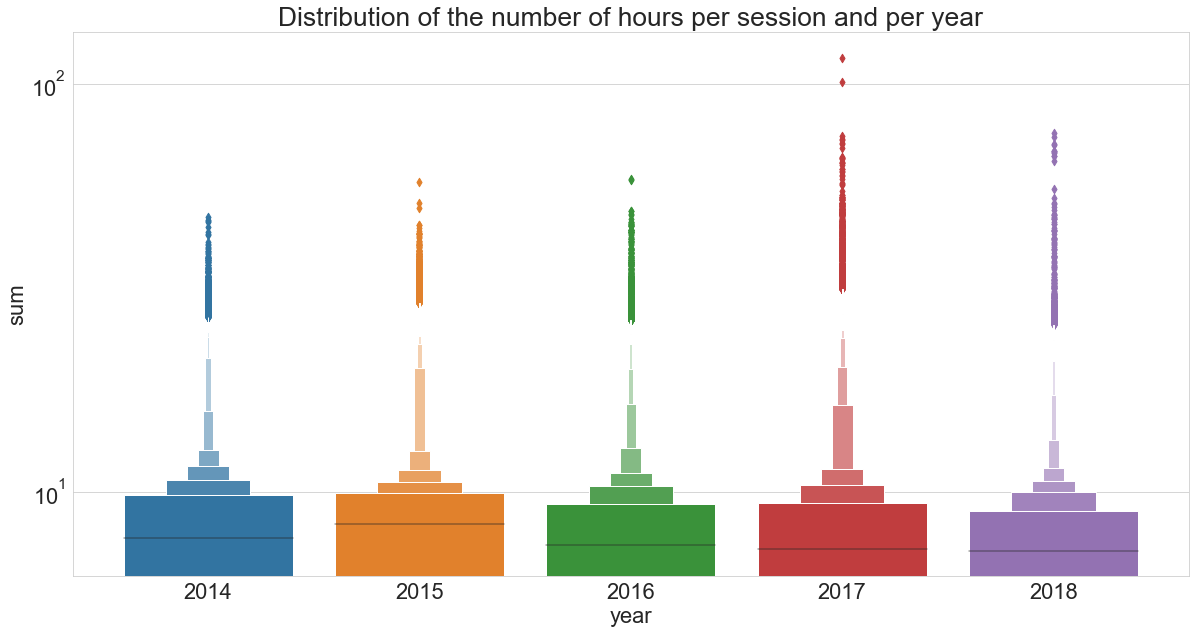

In [57]:
g =sns.boxenplot(data=swipe_per_day_per_user_df,x="year",y="sum")
g.set_title("Distribution of the number of hours per session and per year");

g.semilogy()

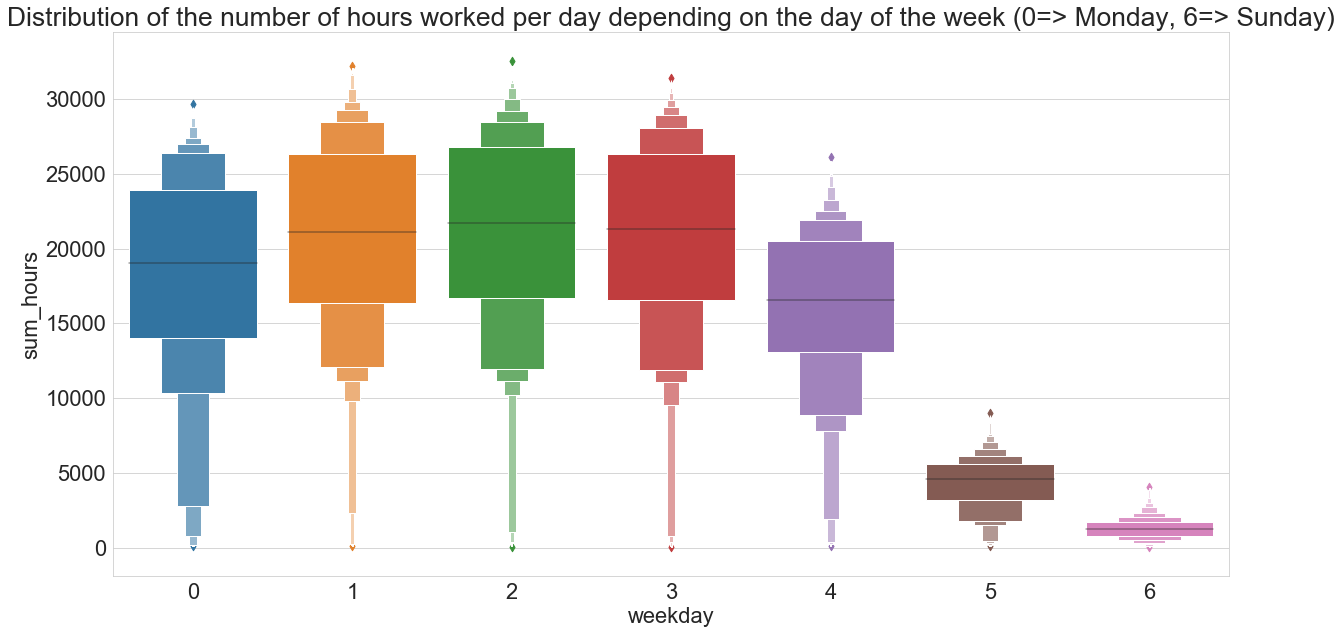

In [58]:
sns.set_style("whitegrid")
sns.boxenplot(data=people_per_day,x="weekday",y="sum_hours")\
.set_title("Distribution of the number of hours worked per day depending on the day of the week (0=> Monday, 6=> Sunday)");


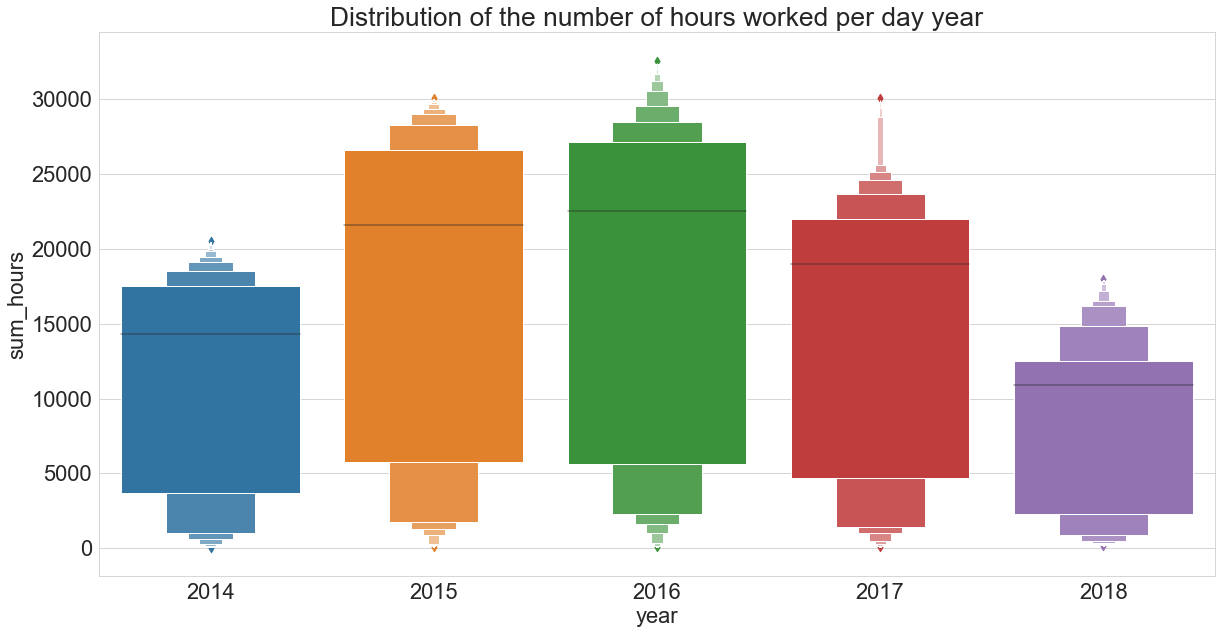

In [47]:
sns.set_style("whitegrid")
sns.boxenplot(data=people_per_day,x="year",y="sum_hours")\
.set_title("Distribution of the number of hours worked per day year");


[]

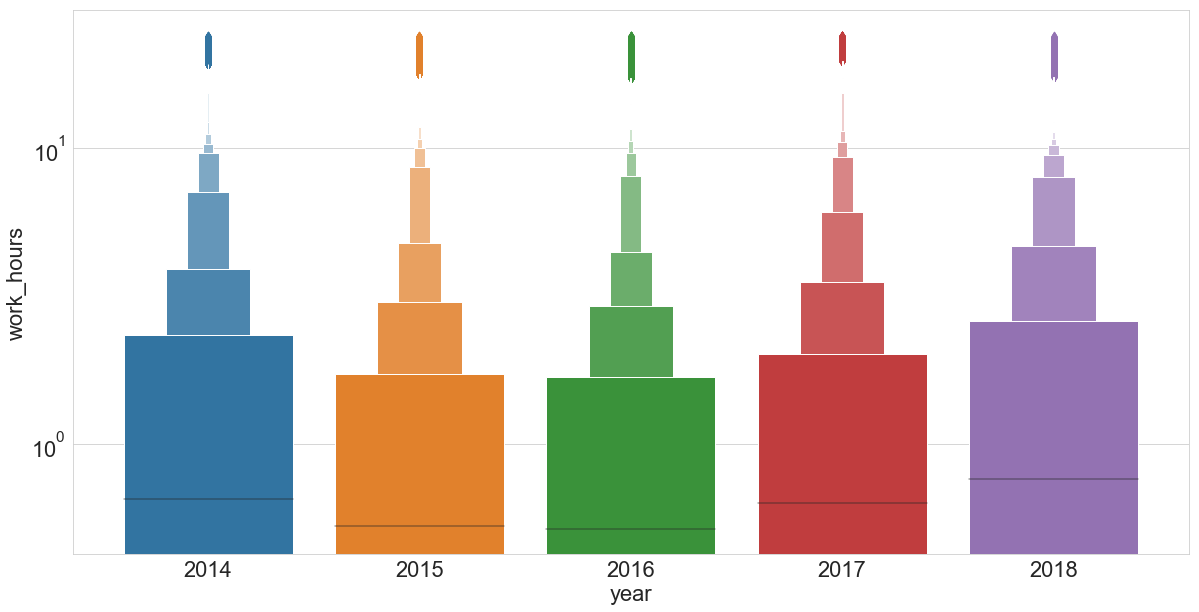

In [39]:
sns.set_style("whitegrid")
g = sns.boxenplot(data=all_data_but_2013,x="year",y="work_hours")
g.semilogy()

[]

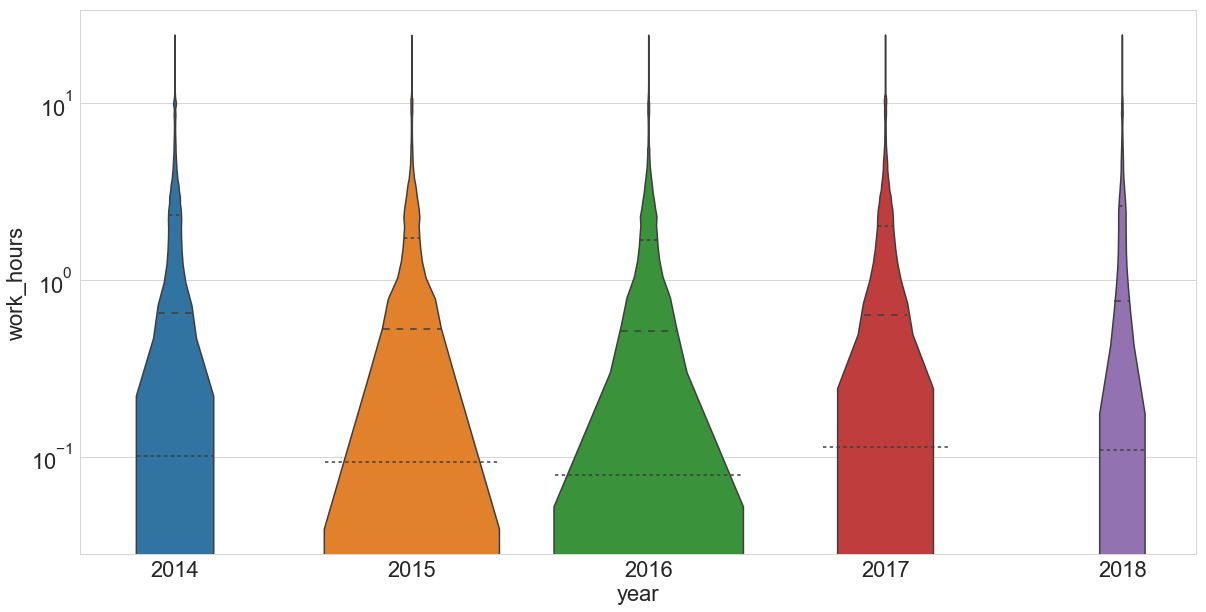

In [41]:
sns.set_style("whitegrid")
g = sns.violinplot(data=all_data_but_2013,x="year",y="work_hours",scale = 'count',inner = 'quartile')
g.semilogy()

[]

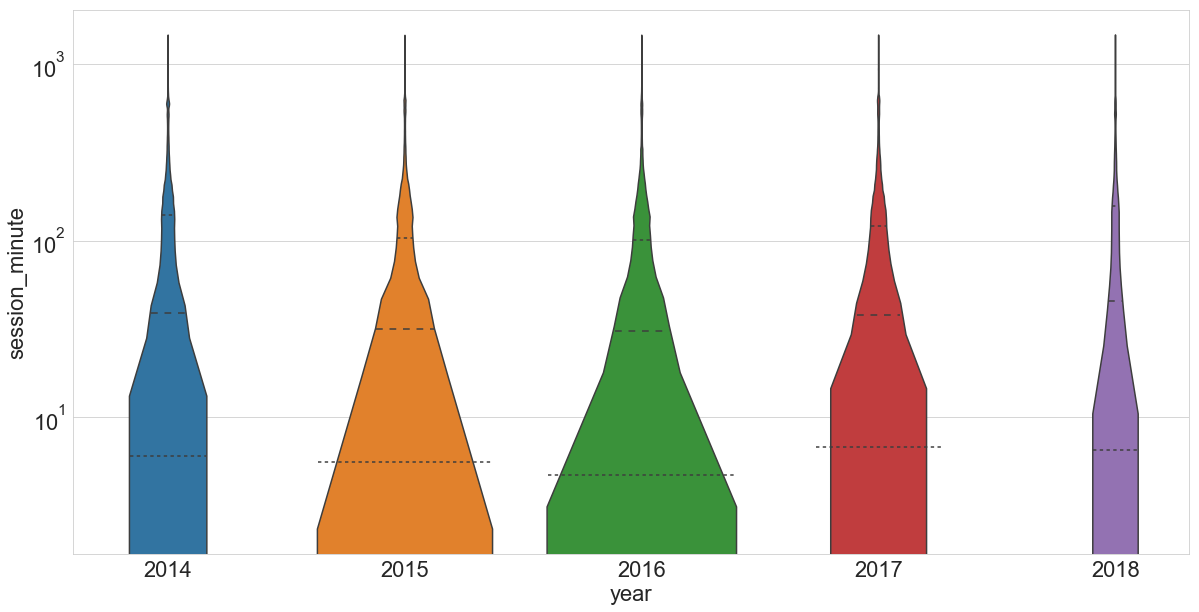

In [43]:
sns.set_style("whitegrid")
g = sns.violinplot(data=all_data_but_2013,x="year",y="session_minute",scale = 'count',inner = 'quartile')
g.semilogy()

In [27]:
trade_per_day=swipe_per_day_per_user.reset_index().groupby(["trade","swipeIn_date"])\
.agg({'trade': 'count', 'sum': 'sum','max':'max',"median":"median",'min':'min'})\
.rename(columns={'trade':'trade_count',"sum":"sum_hours"})\
.reset_index()

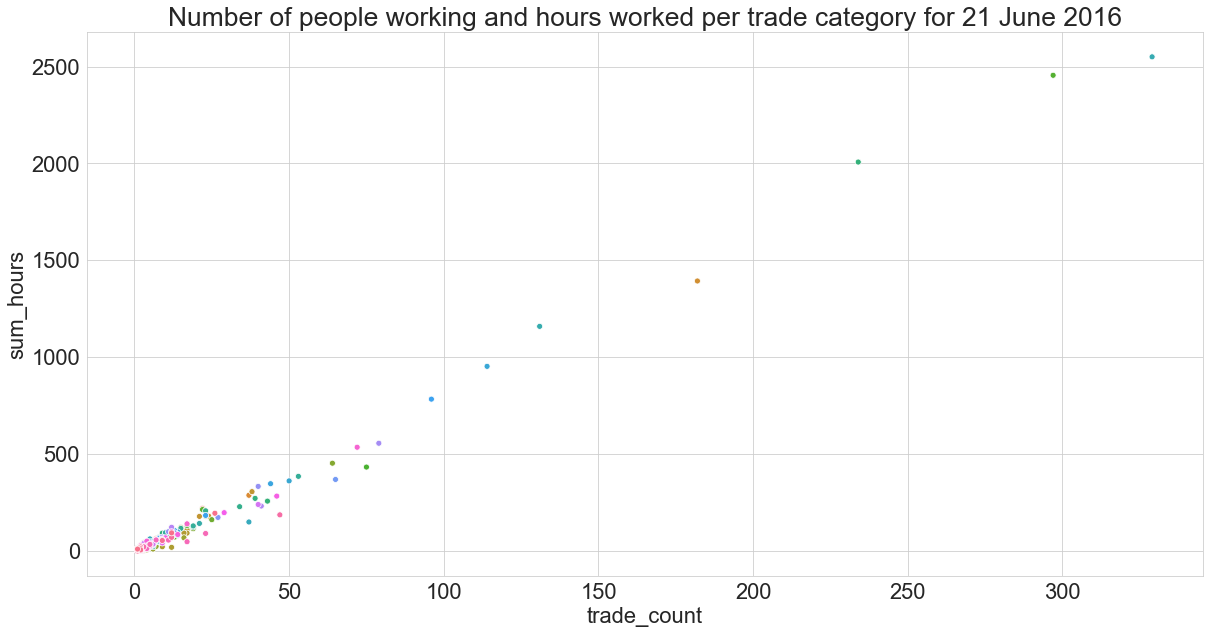

In [37]:
#We can graphically confirm that people indeed work a little more than 8 hours per day!
sns.scatterplot(data=trade_per_day[trade_per_day.swipeIn_date=='2016-06-21'],
                x="trade_count",y="sum_hours",hue="trade",
               legend=False)\
.set_title("Number of people working and hours worked per trade category for 21 June 2016");

In [38]:
all_data_but_2013["swipe_in_out_same_day"] = all_data_but_2013.swipeIn.dt.date == all_data_but_2013.swipeOut.dt.date

In [39]:
#Only a very small portion of the swipes have different date for swipe in and out.
sum(all_data_but_2013["swipe_in_out_same_day"])/all_data_but_2013.shape[0]

0.9926886705863225